# 特征工程

## 1.导入包

In [92]:
import pandas as pd 
import numpy as np
# 拷贝所用的包
from copy import deepcopy

#绘图所用到的包
import matplotlib.pyplot as plt
import matplotlib as mpl

# 处理时间数据所用到的包
from datetime import datetime, timedelta

# 保存我们构建好的模型和对象
from joblib import dump, load

# dataframe自动报告
import pandas_profiling

#计算距离的包
import gpxpy.geo

#机器聚类算法的包
from sklearn.cluster import KMeans,MiniBatchKMeans

## 2.导入数据

In [93]:
df = pd.read_csv('../data/clean_data.csv', compression='gzip')

In [94]:
len(df)

3708329

## 3.空间数据特征工程

In [95]:
coord = df[['pick_lat','pick_lng']].values
coord

array([[12.975773, 77.57107 ],
       [12.930813, 77.60953 ],
       [12.960213, 77.58746 ],
       ...,
       [12.907576, 77.600685],
       [12.956665, 77.52187 ],
       [12.987954, 77.55588 ]])

In [96]:
#聚类算法的函数
def makingReginons(noOfRegions):
    regions = MiniBatchKMeans(n_clusters=noOfRegions, random_state=0, batch_size=10000).fit(coord)
    
    regionsCenters = regions.cluster_centers_
    totalClusters = len(regionsCenters)
    return regionsCenters,totalClusters

In [97]:
#构建聚类评估效果的函数
def min_distance(regionsCenters,totalClusters):
    #好的中心点 = 0
    good_points = 0
    # 坏的中心点
    bad_points = 0

    #初始化存储好坏中心点的list 
    more_dist = []
    less_dist = []

    # 聚类距离的最小值
    min_distance = np.inf

    #遍历中心点
    for i in range(totalClusters):
        good_points = 0
        bad_points = 0
        #这段代码中 good_points 和 bad_points 在外层循环和内层循环都会被用到，
        #而且需要累加每个聚类中心与其他聚类中心距离的情况，所以需要在外层循环之前和内层循环之前都要初始化为零。
        #这样做可以避免在下一个聚类中心的计算中出现错误的结果。同时，在外层循环中重新初始化这两个变量，则是为了确保每次对不同聚类中心之间的距离计算时，good_points 和 bad_points 变量的值都是从零开始计算的。
        for j in range(totalClusters):
            if j!=i:
                distance = gpxpy.geo.haversine_distance(regionsCenters[i][0],regionsCenters[i][1],regionsCenters[j][0],regionsCenters[j][1])

                distance = distance/(1.60934 * 1000)

                # 更新聚类中心点之间的最小距离
                min_distance = min(min_distance,distance)

                 #统计距离小于2英里的聚类数量
                if distance < 2:
                    good_points += 1
                else:
                    bad_points += 1
        less_dist.append(good_points)
        more_dist.append(bad_points)
    
    # 输出聚类的结果
    print("在选择一个聚类大小为 {} 的情况下：".format(totalClusters))

    # 以聚类中心点为圆心，2英里半径内，平均有多少个聚类
    print("距离聚类中心小于 2 英里的范围内平均有{}个聚类".format(np.ceil(sum(less_dist)/len(less_dist))))

    # 以聚类中心点为圆心，2英里半外，平均有多少个聚类
    print("计算距离聚类中心大于 2 英里的范围内平均有{}个聚类".format(np.ceil(sum(more_dist) / len(more_dist))))

    # 输出所有聚类之间的最小聚类
    print("任意聚类之间的最小聚类是{}".format(min_distance))

    # 分隔符
    print("--------------------------------------------------")



In [98]:
for i in range(10,100,10):
    regionsCenters,totalClusters = makingReginons(i)
    min_distance(regionsCenters,totalClusters)

在选择一个聚类大小为 10 的情况下：
距离聚类中心小于 2 英里的范围内平均有0.0个聚类
计算距离聚类中心大于 2 英里的范围内平均有9.0个聚类
任意聚类之间的最小聚类是2.457379281574741
--------------------------------------------------
在选择一个聚类大小为 20 的情况下：
距离聚类中心小于 2 英里的范围内平均有1.0个聚类
计算距离聚类中心大于 2 英里的范围内平均有19.0个聚类
任意聚类之间的最小聚类是1.7186605675505933
--------------------------------------------------
在选择一个聚类大小为 30 的情况下：
距离聚类中心小于 2 英里的范围内平均有2.0个聚类
计算距离聚类中心大于 2 英里的范围内平均有28.0个聚类
任意聚类之间的最小聚类是1.1548169069234664
--------------------------------------------------
在选择一个聚类大小为 40 的情况下：
距离聚类中心小于 2 英里的范围内平均有2.0个聚类
计算距离聚类中心大于 2 英里的范围内平均有38.0个聚类
任意聚类之间的最小聚类是0.7985472553176747
--------------------------------------------------
在选择一个聚类大小为 50 的情况下：
距离聚类中心小于 2 英里的范围内平均有3.0个聚类
计算距离聚类中心大于 2 英里的范围内平均有47.0个聚类
任意聚类之间的最小聚类是0.7138689545715142
--------------------------------------------------
在选择一个聚类大小为 60 的情况下：
距离聚类中心小于 2 英里的范围内平均有4.0个聚类
计算距离聚类中心大于 2 英里的范围内平均有56.0个聚类
任意聚类之间的最小聚类是0.4433338408202395
--------------------------------------------------
在选择一个聚类大小为 70 的情况下：
距离聚类中心小于 2 英里的范围内平均有4.0个聚类
计

In [99]:
# 选取K值为50
coord = df[['pick_lat','pick_lng']].values

In [100]:
regions = MiniBatchKMeans(n_clusters=50, random_state=0, batch_size=10000).fit(coord)

In [101]:
# 将每个数据点所属的聚类簇编号赋值给了数据集df中的新列"pickup_cluster"
df['pickup_cluster'] = regions.predict(df[['pick_lat','pick_lng']])

c:\Users\20228\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  warnings.warn(


In [102]:
df

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,geodesic_distance,hour,mins,day,month,year,dayofweek,booking_stamp,booking_time_diff_hr,booking_time_diff_min,pickup_cluster
0,2020-10-10 07:34:16,-1.0,12.975773,77.571070,12.878468,77.445330,17.38,7,34,10,10,2020,5,1602315256,445087.0,26705254.0,15
1,2020-10-11 08:23:42,-1.0,12.930813,77.609530,12.960320,77.587210,4.06,8,23,11,10,2020,6,1602404622,24.0,1489.0,28
2,2020-10-11 11:57:17,-1.0,12.960213,77.587460,12.930824,77.609610,4.04,11,57,11,10,2020,6,1602417437,3.0,213.0,24
3,2020-10-16 17:51:07,-1.0,12.924353,77.549410,12.932216,77.581825,3.62,17,51,16,10,2020,4,1602870667,125.0,7553.0,3
4,2020-10-30 09:00:44,-1.0,12.945731,77.622500,12.973030,77.616840,3.08,9,0,30,10,2020,4,1604048444,327.0,19629.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708324,2021-02-12 19:37:11,99999.0,13.029848,77.593400,13.063751,77.589850,3.77,19,37,12,2,2021,4,1613158631,24.0,1498.0,48
3708325,2021-02-19 20:43:25,99999.0,13.029296,77.592580,12.927923,77.627106,11.82,20,43,19,2,2021,4,1613767405,169.0,10146.0,48
3708326,2021-02-20 17:34:45,99999.0,12.907576,77.600685,12.925874,77.607620,2.16,17,34,20,2,2021,5,1613842485,20.0,1251.0,1
3708327,2021-02-27 08:26:23,99999.0,12.956665,77.521870,12.948099,77.562990,4.56,8,26,27,2,2021,5,1614414383,158.0,9531.0,29


joblib 库中的 dump() 函数是一个用于将 Python 对象序列化为本地文件的功能。具体来说，它可以将 Python 对象保存到磁盘上以备后续使用或传输到其他计算机。


In [103]:
# 使用 joblib 库的 dump 函数将 regions 对象保存到本地磁盘
# 参数说明：
# regions：要保存的对象
# '../Model/pickup_cluster_model.joblib'：保存到本地的文件路径和名称
# compress=3：指定压缩级别，默认为0，最高为9
dump(regions,"../Model/pickup_cluster.joblib",compress=3)

['../Model/pickup_cluster.joblib']

## 4.可视化绘制

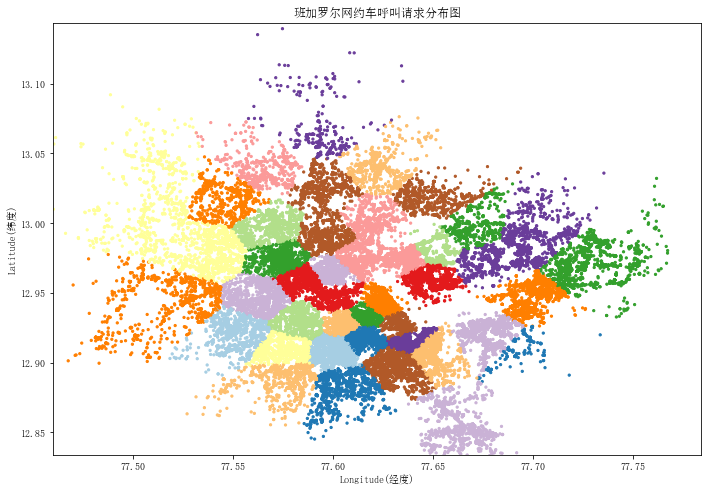

In [104]:
#选取的城市班加罗尔
#boundingbox = ['12.8340125', '13.1436649', '77.4601025', '77.7840515']
mpl.rcParams['font.family'] = 'SimSun' # 设置字体为宋体
mpl.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

bangalore_latitude_range = (12.8340125, 13.1436649)
bangalore_longitude_range = (77.4601025, 77.7840515)

fig = plt.figure()

ax = fig.add_axes([0,0,1.5,1.5])

# 调用scatter方法，在Axes对象上绘制散点图

ax.scatter(x = df.pick_lng.values[:100000],y = df.pick_lat.values[:100000],c = df.pickup_cluster.values[:100000],s = 5,cmap = 'Paired')

# 设置坐标轴的范围
ax.set_xlim(bangalore_longitude_range)
ax.set_ylim(bangalore_latitude_range)

# 标题和x,y轴的label
ax.set_title("班加罗尔网约车呼叫请求分布图")
ax.set_xlabel('Longitude(经度)')
ax.set_ylabel('Latitude(纬度)')

plt.show()

## 5.将乘客请求按照30分钟的时间间隔进行分组，并计算每个分组内每个地理位置（pickup cluster）的请求总数

In [105]:
def round_timestamp_30interval(x):
    if type(x)==str:
        x = datetime.strptime(x,'%Y-%m-%d %H:%M:%S')
    # 计算距离这个小时开始多少分钟，并向下取整到 30 分钟的整点
    # 然后再用这个差值减去当前时间的分钟、秒和微秒数
        return x - timedelta(minutes=x.minute % 30,seconds=x.second,microseconds=x.microsecond)

In [106]:
df['ts'] = np.vectorize(round_timestamp_30interval)(df['ts'])

In [107]:
dataset = deepcopy(df)
dataset.ts = pd.to_datetime(dataset.ts)

In [108]:
dataset = dataset[['ts','number','pickup_cluster']]

In [109]:
dataset=dataset.groupby(by = ['ts','pickup_cluster']).count().reset_index()
dataset.columns = ['ts','pickup_cluster','request_count']

In [110]:
dataset

,ts,pickup_cluster,request_count
0,2020-03-26 01:00:00,13,3
1,2020-03-26 01:00:00,16,1
2,2020-03-26 01:30:00,9,2
3,2020-03-26 01:30:00,13,1
4,2020-03-26 02:00:00,23,1
...,...,...,...
549982,2021-03-26 23:30:00,45,5
549983,2021-03-26 23:30:00,46,4
549984,2021-03-26 23:30:00,47,2
549985,2021-03-26 23:30:00,48,1


In [128]:
366*24*2*50


878400

### 补全缺失的数据

In [112]:
# temp_df dataset 数据相同
# 时间戳是齐全
# ts                     pickup_cluster    request_count
# 2021-07-15 00:00:00        -1                   0

l = [datetime(2020,3,26,00,00,00)+timedelta(minutes=30*i) for i in range(365*24*2)]
#构建一个空的列表df
lt = []

#遍历时间戳
for x in l:
    lt.append([x,-1,0])

temp = pd.DataFrame(lt,columns=['ts','pickup_cluster','request_count'])
dataset = dataset.append(temp,ignore_index=True)

In [113]:
# 将 DataFrame 转换为透视表，索引为时间戳和乘客所在集群，数据值为请求数量
pivot_table = dataset.set_index(['ts','pickup_cluster']).unstack()
# 将缺失的值填充为 0
filled_pivot_table = pivot_table.fillna(0)
# 将频率设置为每 30 分钟，并插入缺失的时间戳
resampled_pivot_table = filled_pivot_table.asfreq(freq = '30min')
# 反转透视表并将乘客所在集群作为新的行索引
stacked_pivot_table = resampled_pivot_table.stack()
# 按照乘客所在集群排序
sorted_stacked_pivot_table = stacked_pivot_table.sort_index(level = 1)
# 重置索引并返回结果 DataFrame
data = sorted_stacked_pivot_table.reset_index()

In [114]:
data = data[data.pickup_cluster>=0]

In [126]:
len(data)

878400

## 6.添加一些时间的特征

In [129]:
data['mins'] = data.ts.dt.minute
data['hour'] = data.ts.dt.hour
data['day'] = data.ts.dt.day
data['month'] = data.ts.dt.month
data['dayofweek'] = data.ts.dt.dayofweek
data['quarter'] = data.ts.dt.quarter

In [130]:
data

,ts,pickup_cluster,request_count,mins,hour,day,month,dayofweek,quarter
17568,2020-03-26 00:00:00,0,0.0,0,0,26,3,3,1
17569,2020-03-26 00:30:00,0,0.0,30,0,26,3,3,1
17570,2020-03-26 01:00:00,0,0.0,0,1,26,3,3,1
17571,2020-03-26 01:30:00,0,0.0,30,1,26,3,3,1
17572,2020-03-26 02:00:00,0,0.0,0,2,26,3,3,1
...,...,...,...,...,...,...,...,...,...
895963,2021-03-26 21:30:00,49,12.0,30,21,26,3,4,1
895964,2021-03-26 22:00:00,49,9.0,0,22,26,3,4,1
895965,2021-03-26 22:30:00,49,8.0,30,22,26,3,4,1
895966,2021-03-26 23:00:00,49,9.0,0,23,26,3,4,1


In [131]:
data.to_csv('../data/Data_Perpared.csv',index=False,compression='gzip')

In [132]:
profile = data.profile_report(title='Txai Data Report')
profile.to_file(output_file="../data/Data_Perpared_Report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 249.99it/s]
